In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout

In [3]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

In [4]:
train_df.shape

(60000, 785)

In [5]:
test_df.shape

(10000, 785)

In [6]:
train_df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [8]:
from sklearn.model_selection import train_test_split

In [11]:
training = np.asarray(train_df,dtype = 'float32')
X_train = training[:,1:].reshape([-1,28,28,1])
y_train = training[:,0]

testing  = np.asarray(test_df,dtype = 'float32')
X_test = testing[:,1:].reshape([-1,28,28,1])
y_test = testing[:,0]


In [12]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size = 0.2,random_state = 5)

In [13]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [16]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap = 'Greys')

In [19]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

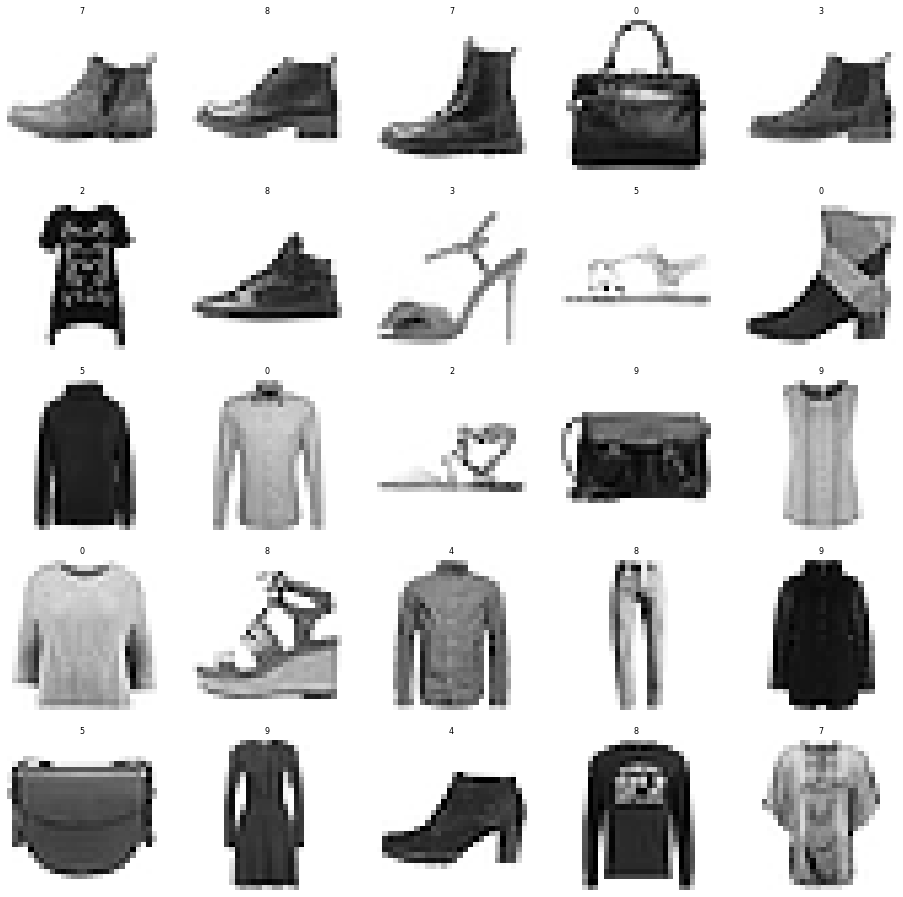

In [24]:
n_train = len(training)
plt.figure(figsize=(16,16))
j = 1
for i in np.random.randint(0,1000,25):
    index = np.random.randint(0, n_train)
    plt.subplot(5,5,j)
    j+=1
    plt.imshow(X_train[i], cmap="Greys")
    plt.axis('off') # off the axis
    plt.title(int(training[index, 0]), fontsize=8)


In [32]:
X_train = X_train/255
X_test = X_test/255

In [36]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((48000, 28, 28, 1),
 (48000,),
 (12000, 28, 28, 1),
 (12000,),
 (10000, 28, 28, 1),
 (10000,))

In [38]:
cnn_model = Sequential([Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         MaxPooling2D(pool_size=(2,2)),
                         Conv2D(filters=64, kernel_size=3, strides=(2,2), padding='same', activation='relu'),
                         MaxPooling2D(pool_size=(2,2)),
                         Flatten(),
                         Dense(units=128, activation='relu'),
                         Dropout(0.25),
                         Dense(units=256, activation='relu'),
                         Dropout(0.25),
                         Dense(units=128, activation='relu'),
                         Dense(units=10, activation='softmax')
                         ])

In [40]:
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the Model
cnn_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1, validation_data=(X_val, y_val))
  

Epoch 1/20
3000/3000 [==============================] - 31s 10ms/step - loss: 0.5558 - accuracy: 0.7945 - val_loss: 36.2073 - val_accuracy: 0.8360
Epoch 2/20
3000/3000 [==============================] - 28s 9ms/step - loss: 0.3676 - accuracy: 0.8661 - val_loss: 33.8548 - val_accuracy: 0.8217
Epoch 3/20
3000/3000 [==============================] - 28s 9ms/step - loss: 0.3231 - accuracy: 0.8822 - val_loss: 30.1005 - val_accuracy: 0.8365
Epoch 4/20
3000/3000 [==============================] - 29s 10ms/step - loss: 0.2931 - accuracy: 0.8929 - val_loss: 38.2793 - val_accuracy: 0.8035
Epoch 5/20
3000/3000 [==============================] - 30s 10ms/step - loss: 0.2757 - accuracy: 0.8987 - val_loss: 36.8700 - val_accuracy: 0.8257
Epoch 6/20
3000/3000 [==============================] - 30s 10ms/step - loss: 0.2601 - accuracy: 0.9039 - val_loss: 25.3183 - val_accuracy: 0.8301
Epoch 7/20
3000/3000 [==============================] - 29s 10ms/step - loss: 0.2482 - accuracy: 0.9085 - val_loss: 44.7

In [41]:
y_pred = cnn_model.predict(X_test)

313/313 [==============================] - 2s 5ms/step


In [42]:
cnn_model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2876 - accuracy: 0.9091


[0.28764477372169495, 0.9090999960899353]

In [44]:
y_pred = y_pred.argmax(axis=-1)

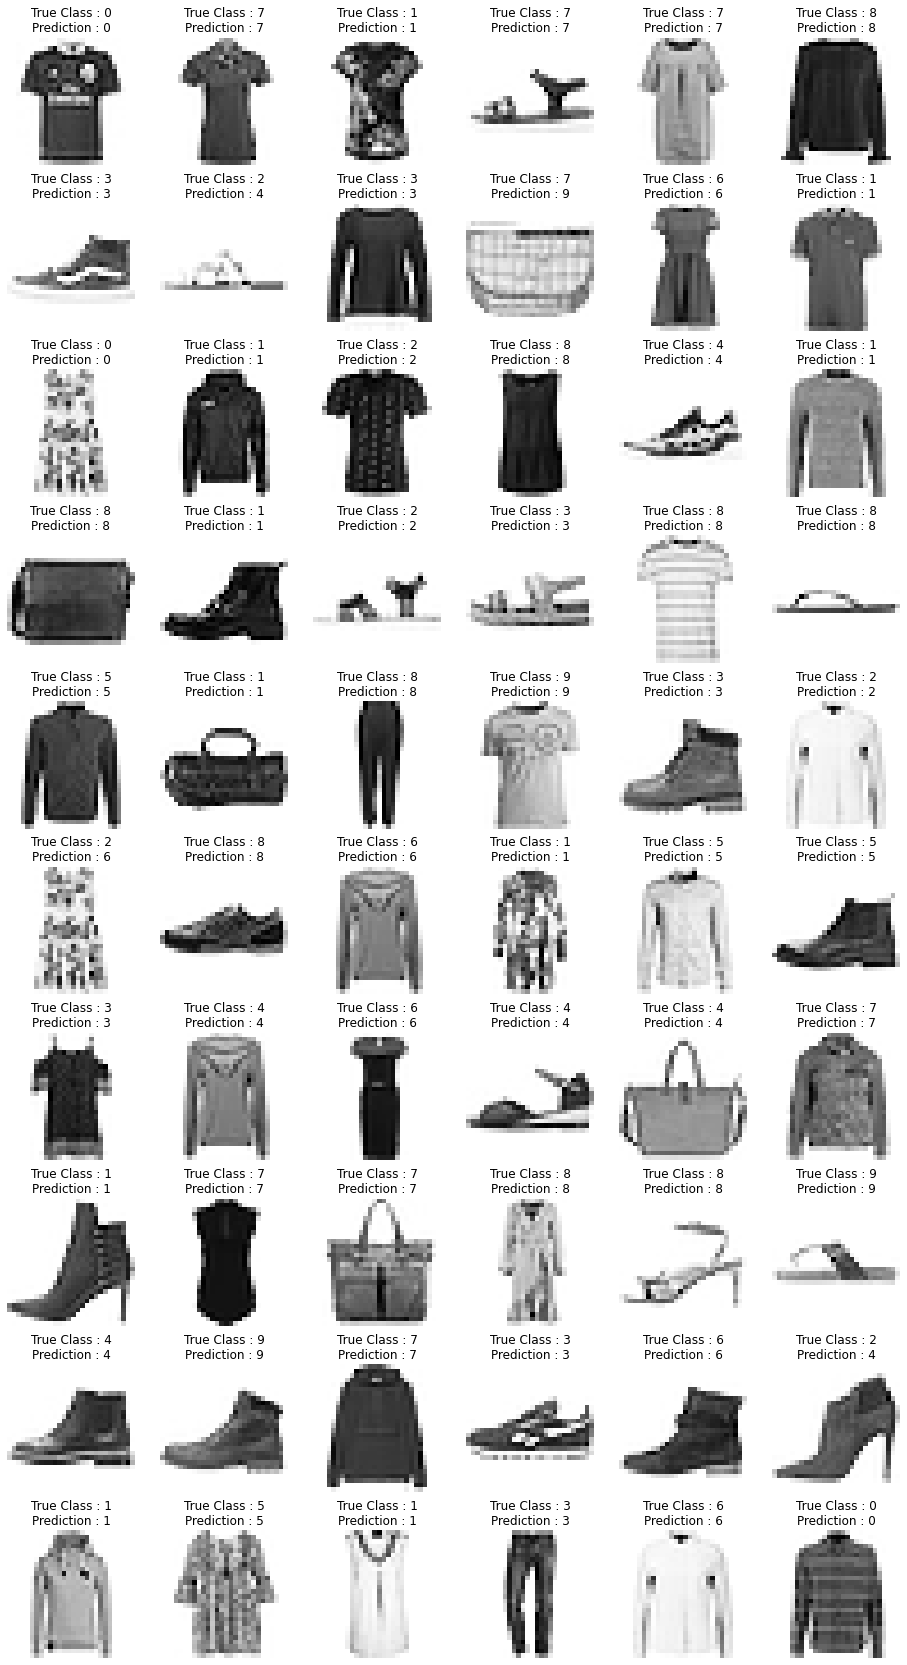

In [45]:
plt.figure(figsize=(16,30))

j=1
for i in np.random.randint(0, 1000,60):
    index = np.random.randint(len(y_pred))
    plt.subplot(10,6, j)
    j+=1
    plt.imshow(X_test[i].reshape(28,28), cmap = 'Greys')
    plt.title("True Class : {:0.0f}\nPrediction : {:d}".format(y_test[index],y_pred[index]))
    plt.axis('off')

<AxesSubplot:>

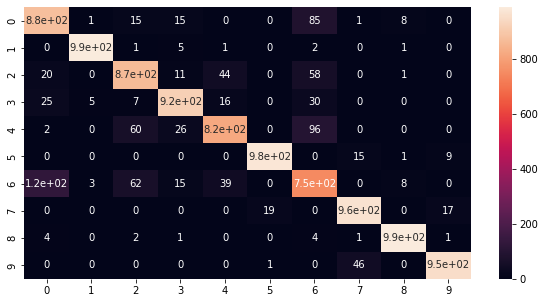

In [50]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True)

In [52]:
from sklearn.metrics import classification_report
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)

              precision    recall  f1-score   support

     class 0       0.83      0.88      0.85      1000
     class 1       0.99      0.99      0.99      1000
     class 2       0.85      0.87      0.86      1000
     class 3       0.93      0.92      0.92      1000
     class 4       0.89      0.82      0.85      1000
     class 5       0.98      0.97      0.98      1000
     class 6       0.73      0.75      0.74      1000
     class 7       0.94      0.96      0.95      1000
     class 8       0.98      0.99      0.98      1000
     class 9       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

